In [2]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *

In [3]:
# Initial conditions (alpha0) and Jacobi interval
alpha0 = 50/384400 # initial guess for alpha

# C = 2U(r) - (vx^2 + vy^2)
C_range = [3.1370, 3.1493]

# Initialize list of families
L1_family = []
L2_family = []


In [4]:
### L1 family 
# Compute non-linear orbit from alpha0
Yd0, DF, FX = nonlin_lyapunov_orbit(XL1, mu, alpha0) #1
Yd1, DF1, FX = PAC(Yd0, DF, mu) #2
Yd2, DF2, FX = PAC(Yd1, DF1, mu) #3


Shooting converged at: 
 [[0.83658071]
 [0.00304914]
 [2.69178148]] 
 that satisfies the constraint with accuracy: 
 [[-1.05333121e-15]
 [ 9.06480006e-15]]


In [5]:
L1_family.append(Yd0)
L1_family.append(Yd1)
L1_family.append(Yd2)

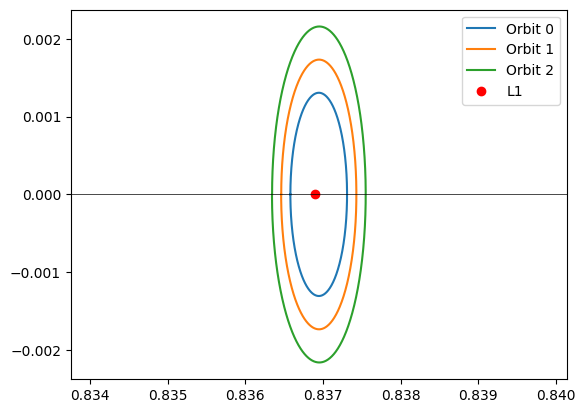

In [6]:
# Plot all the orbits contained in the family
for i in range(len(L1_family)):
    Y, PHI = compute_orbit_Yd(L1_family[i], mu)
    plt.plot(Y[0,:], Y[1,:], label='Orbit %d' % i)

# Plot the Lagrange point
plt.plot([XL1[0]], [XL1[1]], 'ro', label='L1')
# Plot y = 0
plt.axhline(0, color='black', lw=0.5)

plt.axis('equal')
plt.legend()
plt.show()

In [7]:
### L2 family
# Compute non-linear orbit from alpha0
Yd0_L2, DF_L2, FX_L2 = nonlin_lyapunov_orbit(XL2, mu, alpha0) #1
# PAC
Yd1_L2, DF1_L2, FX = PAC(Yd0_L2, DF_L2, mu) #2
Yd2_L2, DF2_L2, FX = PAC(Yd1_L2, DF1_L2, mu) #3


Shooting converged at: 
 [[1.15442965]
 [0.00664386]
 [3.37349234]] 
 that satisfies the constraint with accuracy: 
 [[-1.12238417e-15]
 [-7.66573175e-15]]


In [8]:
L2_family.append(Yd0_L2) 
L2_family.append(Yd1_L2)
L2_family.append(Yd2_L2)

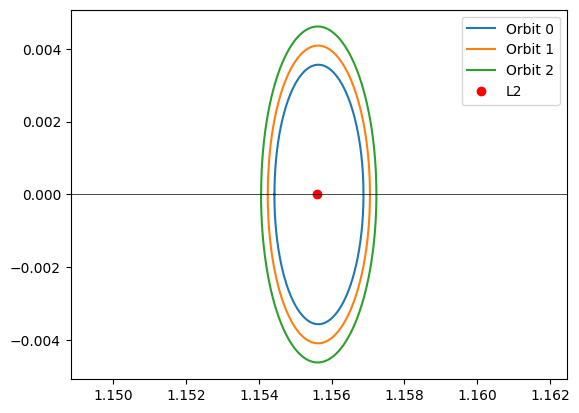

In [9]:
# Plot all the orbits contained in the family
for i in range(len(L2_family)):
    Y, PHI = compute_orbit_Yd(L2_family[i], mu)
    plt.plot(Y[0,:], Y[1,:], label='Orbit %d' % i)

# Plot the Lagrange point
plt.plot([XL2[0]], [XL2[1]], 'ro', label='L2')
plt.axhline(0, color='black', lw=0.5)


plt.axis('equal')
plt.legend()
plt.show()

In [10]:
# We have now three orbits for each family, we can now compute the Jacobi constant for each orbit
C_L1 = []
C_L2 = []


for i in range(len(L1_family)):
    # Current family
    cur = L1_family[i]
    x = float(cur[0][0])
    v = float(cur[1][0])
    C_L1.append(Jacobi(np.array([x, 0]),
                       np.array([0, v]),
                       mu))
# Same for L2
for i in range(len(L2_family)):
    # Current family
    cur = L2_family[i]
    x = float(cur[0][0])
    v =  float(cur[1][0])
    C_L2.append(Jacobi(np.array([x, 0]),
                       np.array([0, v]),
                       mu))
# Print the Jacobi constants
print("Jacobi constants for L1 family:")
print(C_L1)
print("Jacobi constants for L2 family:")
print(C_L2)

Jacobi constants for L1 family:
[np.float64(3.1882793152573274), np.float64(3.188273392484428), np.float64(3.1882658094906207)]
Jacobi constants for L2 family:
[np.float64(3.1720813321253107), np.float64(3.1720708981478793), np.float64(3.1720590415399923)]


In [11]:
# Take the first orbit of each family
Y_L1 = L1_family[0]


from utils import bisection_Jacobi


# A

Jacobi constant: 3.1882793152573274
Entering bisection loop...
Shooting...
Shooting cant change the guess
Jacobi constant: 32.14595647456859
Shooting...
Shooting cant change the guess
Jacobi constant: 9.00307906052883
Shooting...


c:\Users\rafe9\Coding\Trajectory\Ex1\lyapunov.py:38: RuntimeWarning: overflow encountered in matmul
  dPHI = T*A_ @ PHI
c:\Users\rafe9\Coding\Trajectory\.venv\Lib\site-packages\scipy\integrate\_ivp\lsoda.py:161: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  solver._y, solver.t = integrator.run(


ValueError: array must not contain infs or NaNs